In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset from a two-mode distribution
np.random.seed(0)
data = np.concatenate([np.random.normal(-2, 1, 1000), np.random.normal(2, 1, 1000)])

# Define the initial parameters of the single normal distribution
mu = np.random.uniform(-5, 5)
sigma = np.random.uniform(0.1, 5)

# Define the number of iterations and the learning rate for the EM algorithm
n_iterations = 50
learning_rate = 0.1

# Define the Forward and Reverse KL divergence functions
def forward_kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

def reverse_kl_divergence(p, q):
    return np.sum(q * np.log(q / p))

# Define a function to compute the probabilities of each data point belonging to each mode
def compute_probabilities(data, mu1, sigma1, mu2, sigma2):
    p1 = np.exp(-(data - mu1)**2 / (2 * sigma1**2)) /(sigma1 * np.sqrt(2*np.pi))
    p2 = np.exp(-(data - mu2)**2 / (2 * sigma2**2)) / (sigma2 * np.sqrt(2*np.pi))
    p_total = p1 + p2
    p1_given_data = p1 / p_total
    p2_given_data = p2 / p_total
    return p1_given_data, p2_given_data


In [22]:
def update_parameters(data, p1_given_data, p2_given_data, mu, sigma, learning_rate):
  mu_new = (np.sum(p1_given_data * data) + np.sum(p2_given_data * data)) / (np.sum(p1_given_data) + np.sum(p2_given_data))
  sigma_new = np.sqrt((np.sum(p1_given_data * (data - mu_new)**2) + np.sum(p2_given_data * (data - mu_new)**2)) / (np.sum(p1_given_data) + np.sum(p2_given_data)))
  mu = mu + learning_rate * (mu_new - mu)
  sigma = sigma + learning_rate * (sigma_new - sigma)
  return mu, sigma

In [23]:
def plot_distributions(data, mu1, sigma1, mu2, sigma2, mu, sigma):
  fig, ax = plt.subplots(figsize=(8,6))
  ax.hist(data, bins=50, density=True, alpha=0.5, label='Data')
  x = np.linspace(-10, 10, 1000)
  ax.plot(x, np.exp(-(x - mu1)*2 / (2 * sigma1)) / (sigma1 * np.sqrt(2*np.pi)), label='Mode 1')
  ax.plot(x, np.exp(-(x - mu2)*2 / (2 * sigma2)) / (sigma2 * np.sqrt(2*np.pi)), label='Mode 2')
  ax.plot(x, np.exp(-(x - mu)*2 / (2 * sigma2)) / (sigma * np.sqrt(2*np.pi)), label='Single Normal')
  ax.legend()
  ax.set_xlim(-10, 10)
  ax.set_ylim(0, 0.4)
  return fig

In [24]:
for i in range(n_iterations):
# Compute the probabilities of each data point belonging to each mode
  p1_given_data, p2_given_data = compute_probabilities(data, -2, 1, 2, 1)

In [25]:
forward_kl_divergences = []
reverse_kl_divergences = []

In [26]:
forward_frames = []
reverse_frames = []

NameError: ignored

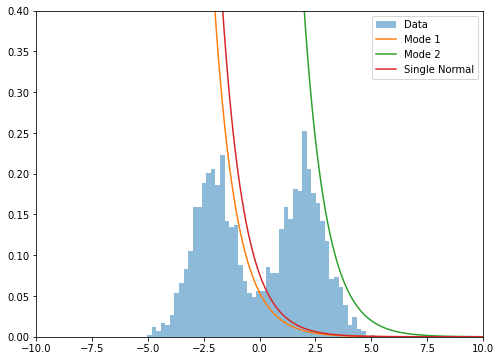

In [27]:
# Compute the Forward KL divergence and update the parameters of the single normal distribution
forward_kl_div = forward_kl_divergence(p1_given_data + p2_given_data, np.exp(-(data - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2*np.pi)))
mu, sigma = update_parameters(data, p1_given_data, p2_given_data, mu, sigma, learning_rate)

# Plot the two-mode distribution and the single normal distribution and save the frame
forward_frames.append(plot_distributions(data, -2, 1, 2, 1, mu, sigma))

# Append the Forward KL divergence value to the list
forward_kl_divergences.append(forward_kl_div)

# Compute the Reverse KL divergence and update the parameters
reverse_kl_div = reverse_kl_divergence(p1_given_data + p2_given_data, p_normal)
mu, sigma = update_parameters(data, p1_given_data + p2_given_data, p_normal, mu, sigma, learning_rate)
# Plot the two-mode distribution and the single normal distribution and save the frame
reverse_frames.append(plot_distributions(data, -2, 1, 2, 1, mu, sigma))

# Append the Reverse KL divergence value to the list
reverse_kl_divergences.append(reverse_kl_div)